<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/Ufo_PandasSeaborn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [2]:
ufo = pd.read_csv('https://bit.ly/uforeports')

In [3]:
ufo.shape

(18241, 5)

In [4]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [5]:
ufo.columns.tolist()

['City', 'Colors Reported', 'Shape Reported', 'State', 'Time']

In [7]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [11]:
ufo[ufo['City'].isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [33]:
print('{:.2}% of the rows are missing the city feature'.format(len((ufo[ufo['City'].isnull()])*100)/len(ufo)))

0.0014% of the rows are missing the city feature


In [34]:
print('{:.2}% of the rows are missing the Colors Reported feature'.format(len((ufo[ufo['Colors Reported'].isnull()])*100)/len(ufo)))

0.84% of the rows are missing the Colors Reported feature


In [35]:
print('{:.2}% of the rows are missing the Shape Reported feature'.format(len((ufo[ufo['Shape Reported'].isnull()])*100)/len(ufo)))

0.14% of the rows are missing the Shape Reported feature


Drop the rows where there is no city

In [39]:
ufo.dropna(subset=['City'], how='any', inplace = True)
ufo.isnull().sum()

City                   0
Colors Reported    15339
Shape Reported      2640
State                  0
Time                   0
dtype: int64

In [49]:
top20_cities = pd.DataFrame(ufo['City'].value_counts().head(20))
top20_cities

,City
Seattle,187
New York City,161
Phoenix,137
Houston,108
Las Vegas,105
Portland,102
San Diego,101
Los Angeles,98
Chicago,73
Austin,62


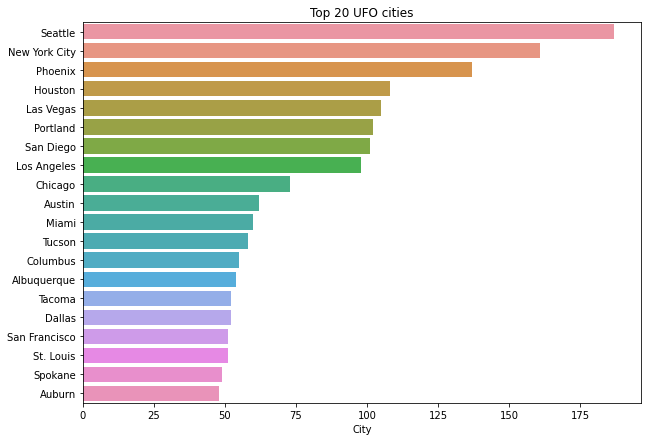

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))
sns.barplot(data = ufo, x = top20_cities['City'], y = top20_cities.index)
plt.title('Top 20 UFO cities')
plt.show()

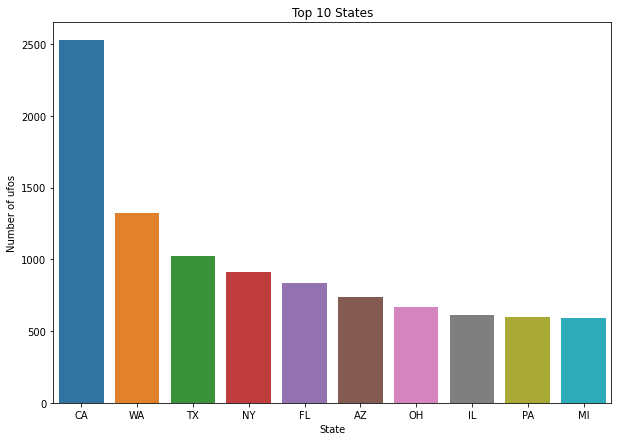

In [64]:
top10_States = pd.DataFrame(ufo['State'].value_counts().head(10))

plt.figure(figsize = (10,7))
sns.barplot(x = top10_States.index, y = top10_States['State'])
plt.title('Top 10 States')
plt.xlabel('State')
plt.ylabel('Number of ufos')
plt.show()